# TERM DEPOSIT SUBSCRIPTION PREDICTION

## PROBLEM STATEMENT:

The aim of this project is to explore, understand and analyze the data collected by a portugese banking company to help maximize the profits earned by their marketing campaign. Given a certain set of features, this model will predict whether a user will subscribe a term deposit or not.

## DATA PREPROCESSING

In [1]:
#Step 1: Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [10]:
#Step 2: Creating a Dataframe
df=pd.read_csv('OneDrive\Desktop\Projects\DSC_Manipal\TrainingSet.csv')
df.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Understanding our Data

In [4]:
#Examining the number of data types and their instances 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 22 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null object
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
contact           32978 non-null object
month             32978 non-null object
day_of_week       32978 non-null object
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null object
dtypes: floa

In [5]:
#Examining statistical properties
df.describe()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000
mean,20620.844533,40.042392,258.808145,2.563376,961.752471,0.174480,0.079562,93.574961,-40.508163,3.618474,5166.942198
std,11878.692749,10.466038,259.565427,2.770355,188.683048,0.497501,1.571342,0.579191,4.633056,1.735421,72.341606
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10346.250000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20649.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30887.750000,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The above code shows that there are no null values in the dataset. 

In [7]:
#Dropping the Contact field, since it isn't relevant.
df1 = df.drop('contact', axis=1)
#Removing the 'unknown' variables so that the number of variables are reduced to a minimum.
df1[['job','education']] = df1[['job','education']].replace(['unknown'],'other')
condition = df1.poutcome == 'other'
df1 = df1.drop(df1[condition].index, axis = 0, inplace = False)

In [8]:
#Converting the seconds to minutes for the duration column
df1['duration'] = df1['duration'].apply(lambda n:n/60).round(2)
df1.head()

,id,age,job,marital,education,default,housing,loan,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


For numerical analysis, The final predictions in the training set are converted to binary values.

In [9]:
df['y'].replace(to_replace='Yes', value=1, inplace=True)
df['y'].replace(to_replace='No',  value=0, inplace=True)
df_dummy=pd.get_dummies(df)
df_dummy.head()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0,56,261,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
1,1,57,149,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
2,2,37,226,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
3,4,56,307,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
4,5,45,198,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0


## EXPLORATORY DATA ANALYSIS 

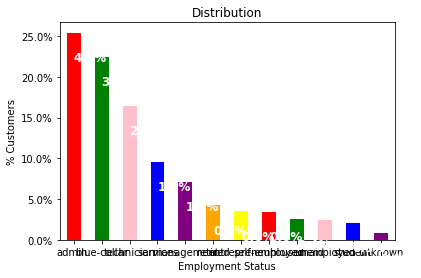

In [15]:
#Employment Status: Exploring the employment status of the customers
colors = ['Red','Green','Pink','Blue','Purple','Orange','Yellow']
ax = (df['job'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Employment Status')
ax.set_ylabel('% Customers')
ax.set_title('Distribution')

#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

#set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.25, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%',fontsize=12, color='white', weight = 'bold')

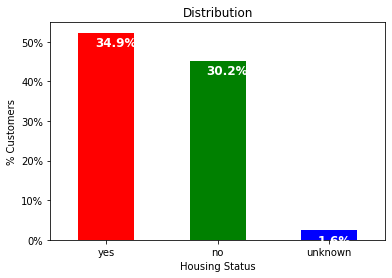

In [16]:
#Housing Status: Exploring the housing status of the customers
colors = ['Red','Green','Blue']
ax = (df1['housing'].value_counts()*100.0 /len(df1)).plot(kind='bar',stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Housing Status')
ax.set_ylabel('% Customers')
ax.set_title('Distribution')

#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

#set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%',fontsize=12,color='white',weight = 'bold')

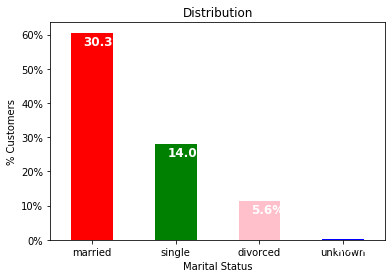

In [17]:
#Marital Status: Exploring the marital status of the customers
colors = ['Red','Green','Pink','Blue']
ax = (df1['marital'].value_counts()*100.0 /len(df1)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Marital Status')
ax.set_title('Distribution')

#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

#set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',fontsize=12,color='white', weight = 'bold')

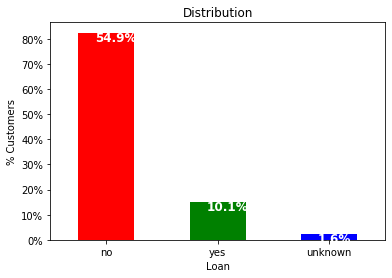

In [18]:
#Lastly, we explore the amount of customers that had a loan at the time they were contacted. 
colors = ['Red','Green','Blue']
ax = (df1['loan'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Loan')
ax.set_title('Distribution')

#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

#set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%',fontsize=12,color='white',weight = 'bold')

Here, we conclude that most of the customers contacted at the time of data collection were:

1) Employed at an administrative roll

2) Married with Residential provision

3) Without loan 

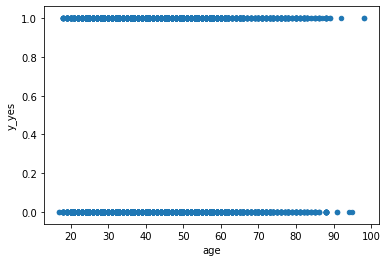

In [19]:
#Relation between age and total positive predictions.
df_dummy[['age', 'y_yes']].plot.scatter(x = 'age', y='y_yes')

Here,it becomes clear that scatter plots are not helping us understand the relation between our dependent and independent variables. 

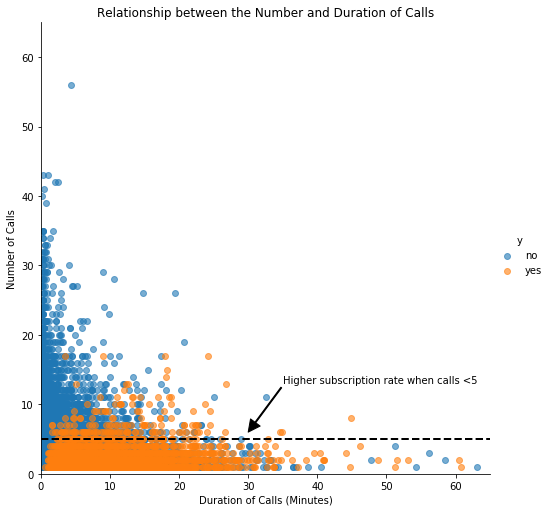

In [20]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = df1,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('Relationship between the Number and Duration of Calls')

plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

This gives us the required relationship. Let's examine further:

In [21]:
#Relationship between age and subscriptions
lst = [df1]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
count_age_response_pct = pd.crosstab(df1['y'],df1['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(df1['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

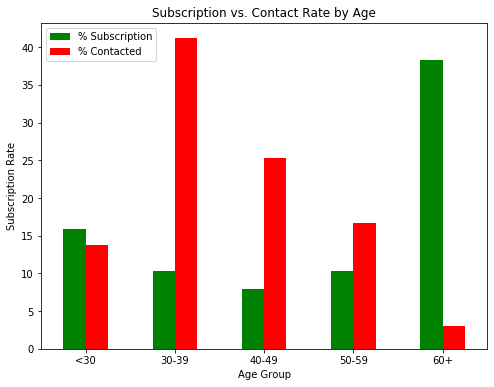

In [22]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

Thus, we observe that the maximum subscribers are over 60 years old. Quite a lot of people under 30 also seem to have subscribed. From this, it seems obvious that the marketing campaign should no longer spend resources targeting the middle-aged customers and instead, focus on the elderly (primarily) and then on the young customers.

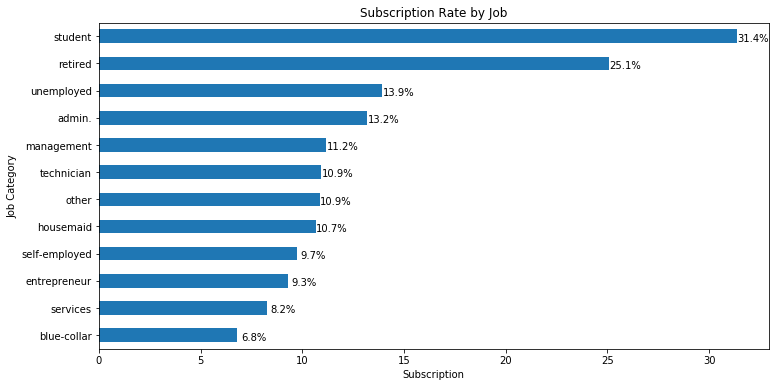

In [23]:
#Relation between employment status and subscriptions
count_job=pd.crosstab(df1['y'],df1['job']).apply(lambda x: x/x.sum() * 100)
count_job=count_job.transpose()
plot_job = count_job['yes'].sort_values(ascending = True).plot(kind ='barh', figsize = (12,6))                                                                             
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription')
plt.ylabel('Job Category')
#Labels
for rec, label in zip(plot_job.patches,count_job['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center', va='bottom')

Again, it is observed that students (below 30) and retired people (around or above 60 years old) are the categories with the highest subscription rate.

## MODELLING APPROACH: LOGISTIC REGRESSION

It seems intutive to use Logistic Regression for a binary classification problem such as this one. 
First, we prepare the dataset for logistic regression.

In [11]:
#Here, we don't consider the id as it doesn't act as a predictor
df2 = df1.iloc[:, 1:7]
df2.head()

,age,job,marital,education,default,housing
0,56,housemaid,married,basic.4y,no,no
1,57,services,married,high.school,unknown,no
2,37,services,married,high.school,no,yes
3,56,services,married,high.school,no,no
4,45,services,married,basic.9y,unknown,no


The above dataframe (df2) now contains only those features which were found essential during exploratory data analysis. 

In [12]:
#Now, we turn all entries in this concise dataframe into binary values 
df3=pd.get_dummies(df2, columns=['job'])
df3=pd.get_dummies(df3, columns=['education'])
df3['housing']=df3['housing'].map({'yes': 1, 'no': 0})
df3['default']=df3['default'].map({'yes': 1, 'no': 0})
#df3['loan']=df3['loan'].map({'yes': 1, 'no': 0})
df_response= pd.DataFrame(df['y'])
df3= pd.merge(df3, df_response, left_index = True, right_index = True)
df3=df3.dropna()
del df3['marital']
df3.head()

,age,default,housing,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,...,job_unemployed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_other,education_professional.course,education_university.degree,y
0,56,0.0,0.0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,no
2,37,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,no
3,56,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,no
6,24,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,no
7,25,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,no


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
#Feature Selection
array = df3.values
X = array[:,0:-1]
Y = array[:,-1]

In [17]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
test_size= 0.30
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)
LR=LogisticRegression()
LR.fit(X_train, Y_train)

C:\Users\smrit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#Accuracy:
predictions = LR.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8713312368972747


In [19]:
#FSCORE:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

          no       0.87      1.00      0.93      6650
         yes       0.00      0.00      0.00       982

    accuracy                           0.87      7632
   macro avg       0.44      0.50      0.47      7632
weighted avg       0.76      0.87      0.81      7632



C:\Users\smrit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


It is observed that we get an accuracy of 87.1% and an F score of 0.93, which is not bad at all!

### Performing Logistic Regression on the given Test set

In [20]:
dft=pd.read_csv('OneDrive\Desktop\Projects\DSC_Manipal\TestSet.csv')
#dft.head()
dft1 = dft.iloc[:, 1:8]
dft1.head()

,age,job,marital,education,default,housing,loan
0,40,admin.,married,basic.6y,no,no,no
1,59,admin.,married,professional.course,no,no,no
2,41,blue-collar,married,unknown,unknown,no,no
3,25,services,single,high.school,no,yes,no
4,57,housemaid,divorced,basic.4y,no,yes,no


In [21]:
#Now, we turn all entries in this concise dataframe into binary values 
dft2=pd.get_dummies(dft1, columns=['job'])
dft2=pd.get_dummies(dft2, columns=['education'])
dft2['housing']=dft2['housing'].map({'yes': 1, 'no': 0})
dft2['default']=dft2['default'].map({'yes': 1, 'no': 0})
dft2['loan']=dft2['loan'].map({'yes': 1, 'no': 0})
#dft2= pd.merge(dft2, df_response, left_index = True, right_index = True)
dft2=dft2.dropna()
del dft2['marital']
del dft2['loan']
dft2.head()

,age,default,housing,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,40,0.0,0.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,59,0.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,25,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,57,0.0,1.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,35,0.0,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
#Feature Selection
array1 = dft2.values
X = array1[:]
X1_test=array1

predictions_test = LR.predict(X1_test)

In [48]:
#CREATING A DATAFRAME OF THE RESULTS TO USE IT IN A CSV LATER-submission purposes only
res_df=pd.DataFrame(predictions_test)
res_df.insert(0, "id", dft.id, True) 
res_df.head()
res_df.to_csv('OneDrive\Desktop\Projects\DSC_Manipal\Result.csv', index=False)

## RESULTS AND ANALYSIS:

### Results:

Accuracy: 87%

F-SCORE of model: 0.93

### Analysis:

There are three factors that seem to be affecting the results of the Marketing Campaign the most, they are: Age, Employment Status and duration of the calls made (campaigns). Based on the model constructed, the following suggestions can help the marketing campaign yield better results:

### 1) Age

While the current marketing campaign seems to be investing a lot in its middle age customers, research shows that it is beneficial to invest in elderly customers (over the age of 60) and in the youth of the customer database (below the age of 30)

### 2) Employment Status:

While most of the customers are employed in administrative roles and then in blue-collar roles, the most positive response of the marketing campaign seems to have come from the student sector, closely followed by those retired. It is noteworthy that these findings agree with those findings related to the age of the customers.

### 3) Duration of the Calls/ Campaigns

A slightly, rather counter-intuitive finding was that the shorter the duration of the call, the more the positive responses came in. This indicates that the customers who were interested in a term deposit subscription, did not need much convincing. This reveals that the campaigns are best-off short, brief and to the point.